<a href="https://colab.research.google.com/github/AnwHus007/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Dependencies**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Exploring Dataset**

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/Twitter_Data.csv')
df1.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/finalSentimentdata2.csv')
df2 = df2.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df2['category'] = df2['category'].map({'sad': -1.0, 'anger': -1.0, 'fear': -1.0, 'joy':1.0})
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2 = df2[['clean_text','category']]
df2.head()

,clean_text,category
0,agree the poor in india are treated badly thei...,-1.0
1,if only i could have spent the with this cutie...,1.0
2,will nature conservation remain a priority in ...,1.0
3,coronavirus disappearing in italy show this to...,-1.0
4,uk records lowest daily virus death toll since...,-1.0


In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/all-data.csv')
df3 = df3.rename(columns={'text': 'clean_text'})
df3 = df3[['clean_text','category']]
df3['category'] = df3['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df3.head()

,clean_text,category
0,"According to Gran , the company has no plans t...",0.0
1,Technopolis plans to develop in stages an area...,0.0
2,The international electronic industry company ...,-1.0
3,With the new production plant the company woul...,1.0
4,According to the company 's updated strategy f...,1.0


In [7]:
df4 = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/apple-twitter-sentiment-texts.csv')
df4 = df4.rename(columns={'text': 'clean_text', 'sentiment':'category'})
df4['category'] = df4['category'].map({-1: -1.0, 0: 0.0, 1:1.0})
df4.head()

,clean_text,category
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1.0
1,What Happened To Apple Inc? http://t.co/FJEX...,0.0
2,Thank u @apple I can now compile all of the pi...,1.0
3,The oddly uplifting story of the Apple co-foun...,0.0
4,@apple can i exchange my iphone for a differen...,0.0


In [8]:
df5 = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/Tweets.csv')
df5 = df5.rename(columns={'text': 'clean_text', 'airline_sentiment':'category'})
df5['category'] = df5['category'].map({'negative': -1.0, 'neutral': 0.0, 'positive':1.0})
df5 = df5[['clean_text','category']]
df5.head()

,clean_text,category
0,@VirginAmerica What @dhepburn said.,0.0
1,@VirginAmerica plus you've added commercials t...,1.0
2,@VirginAmerica I didn't today... Must mean I n...,0.0
3,@VirginAmerica it's really aggressive to blast...,-1.0
4,@VirginAmerica and it's a really big bad thing...,-1.0


In [ ]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [ ]:
# Check for missing data
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [ ]:
# dimensionality of the data
df.shape

(187175, 2)

In [ ]:
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


<Axes: xlabel='category'>

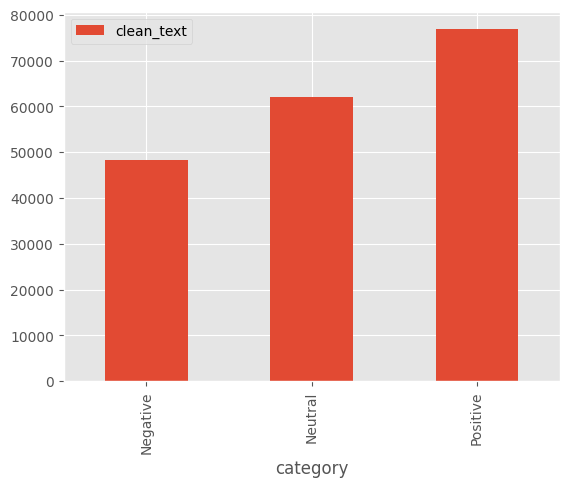

In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

<Axes: >

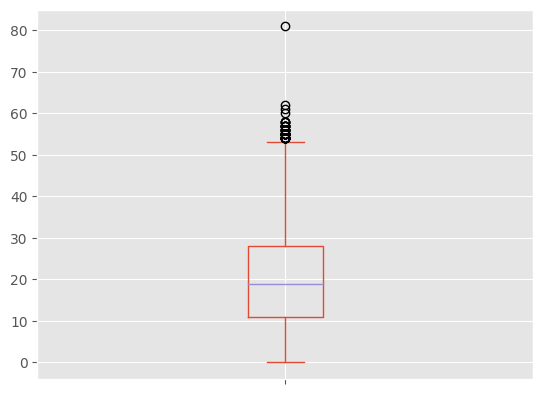

In [ ]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in df['clean_text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

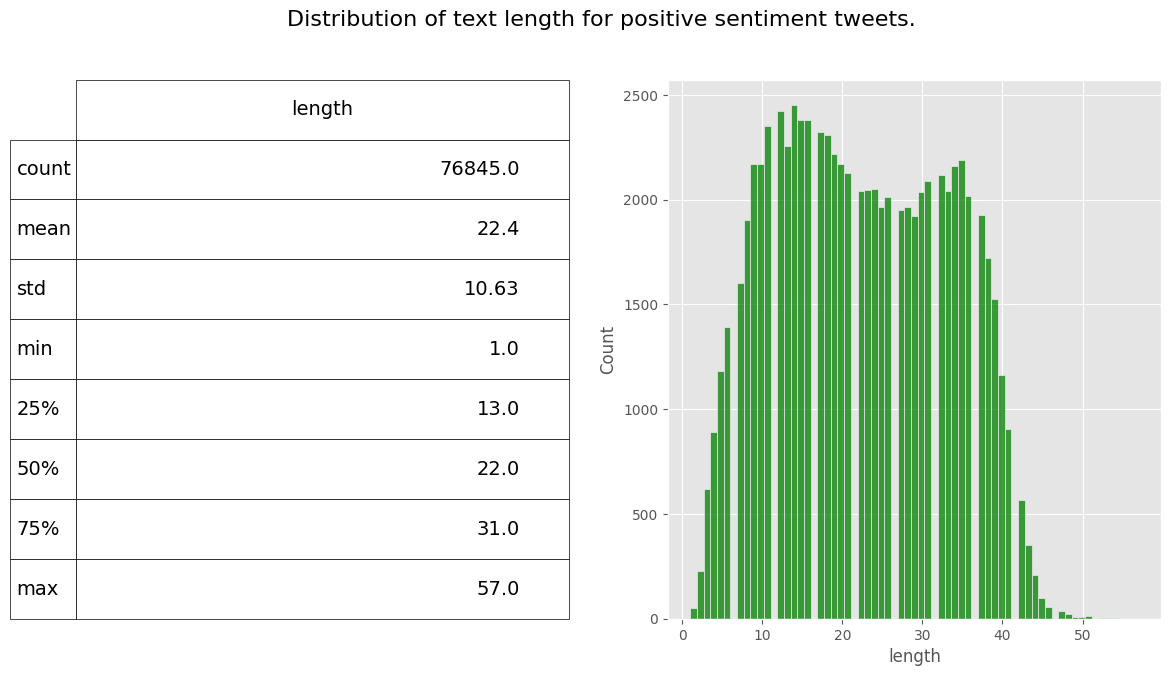

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Positive']['length'], ax=ax1,color='green')
describe = df.length[df.category=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

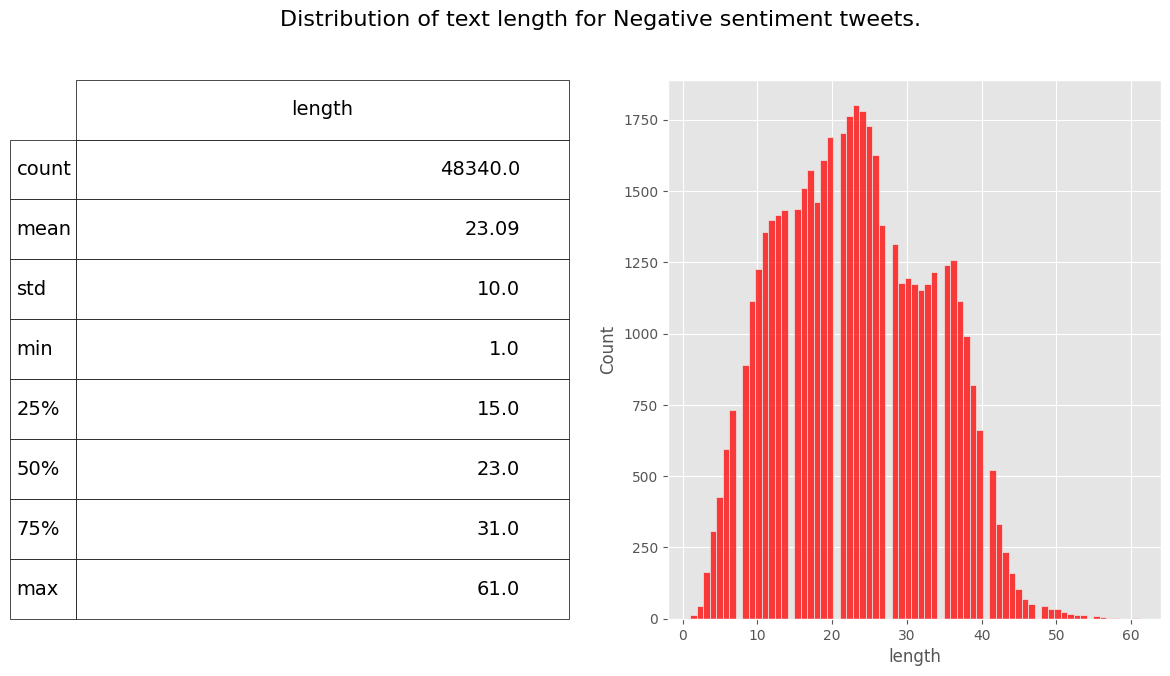

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Negative']['length'], ax=ax1,color='red')
describe = df.length[df.category=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

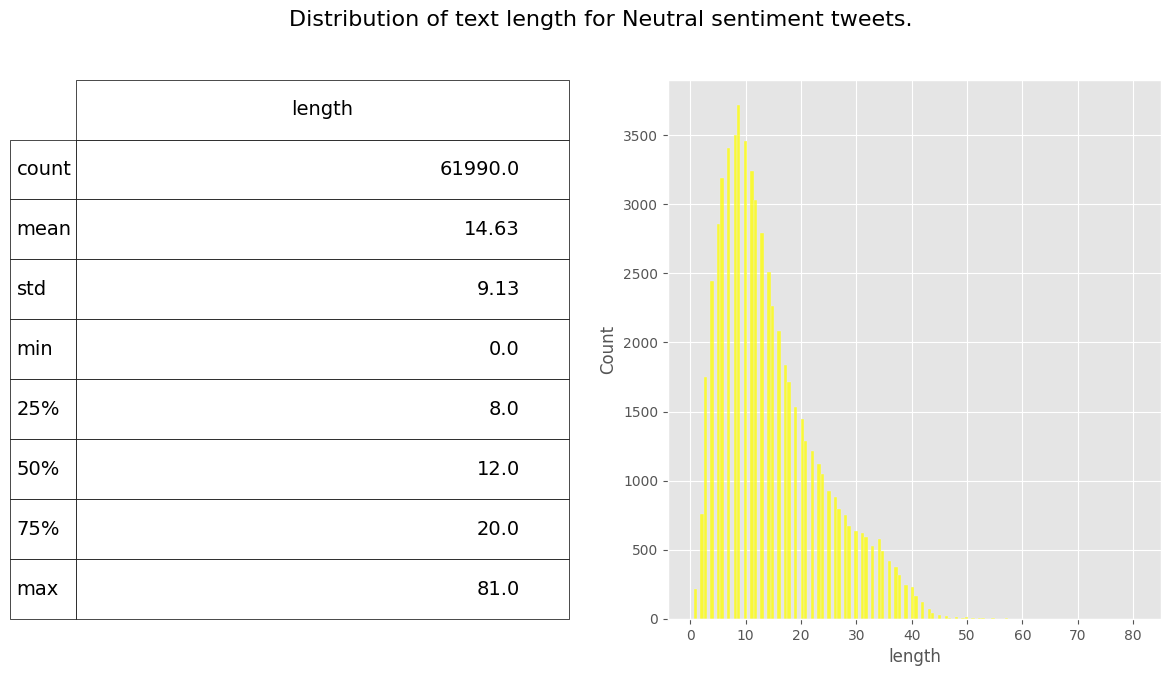

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.clean_text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['category']=='Neutral']['length'], ax=ax1,color='yellow')
describe = df.length[df.category=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral sentiment tweets.', fontsize=16)

plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

In [ ]:
df.drop(['length'], axis=1, inplace=True)
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


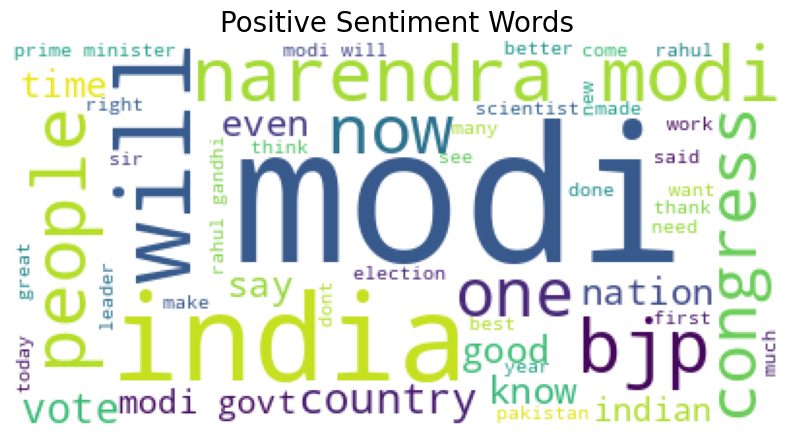

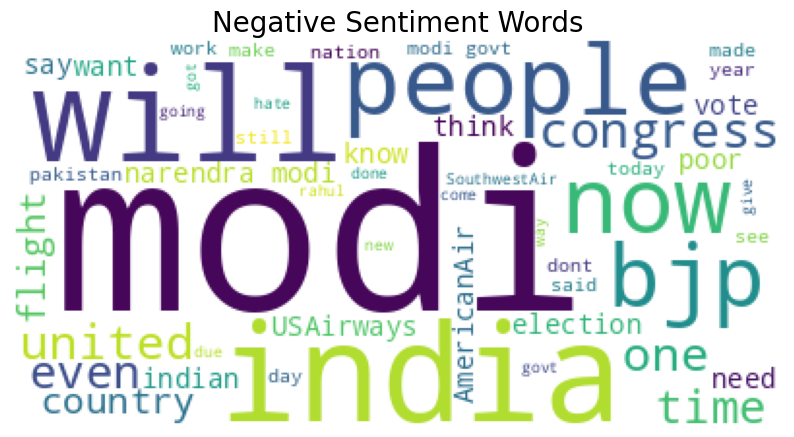

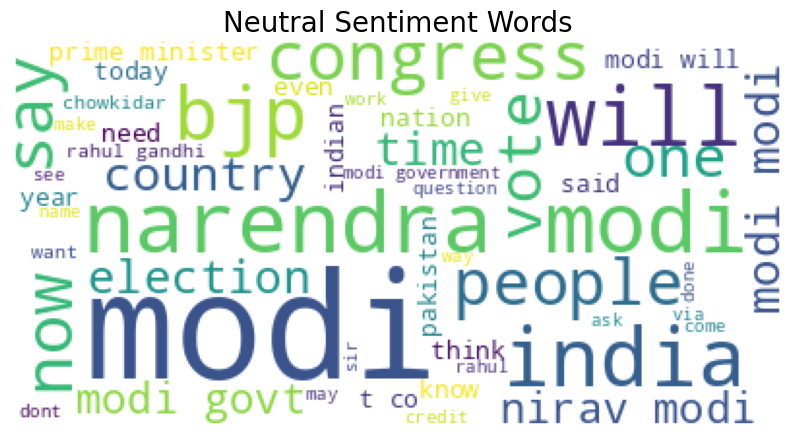

In [ ]:
#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])

    # Initialize wordcloud object
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive tweet words
wordcount_gen(df, 'Positive')

# Negative tweet words
wordcount_gen(df, 'Negative')

# Neutral tweet words
wordcount_gen(df, 'Neutral')

# **VADER Sentiment Analysis**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df = df.assign(Id=range(len(df)))
df.head()

,clean_text,category,Id
0,when modi promised “minimum government maximum...,Negative,0
1,talk all the nonsense and continue all the dra...,Neutral,1
2,what did just say vote for modi welcome bjp t...,Positive,2
3,asking his supporters prefix chowkidar their n...,Positive,3
4,answer who among these the most powerful world...,Positive,4


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['clean_text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/187175 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,clean_text,category
0,0,0.065,0.781,0.154,0.5267,when modi promised “minimum government maximum...,Negative
1,1,0.184,0.816,0.000,-0.4019,talk all the nonsense and continue all the dra...,Neutral
2,2,0.000,0.772,0.228,0.7096,what did just say vote for modi welcome bjp t...,Positive
3,3,0.187,0.655,0.158,-0.0713,asking his supporters prefix chowkidar their n...,Positive
4,4,0.000,0.808,0.192,0.4754,answer who among these the most powerful world...,Positive


# **Vader Results**

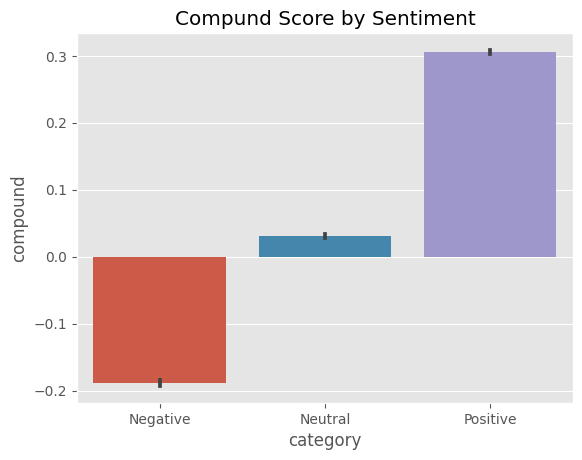

In [ ]:
ax = sns.barplot(data=vaders, x='category', y='compound')
ax.set_title('Compund Score by Sentiment')
plt.show()

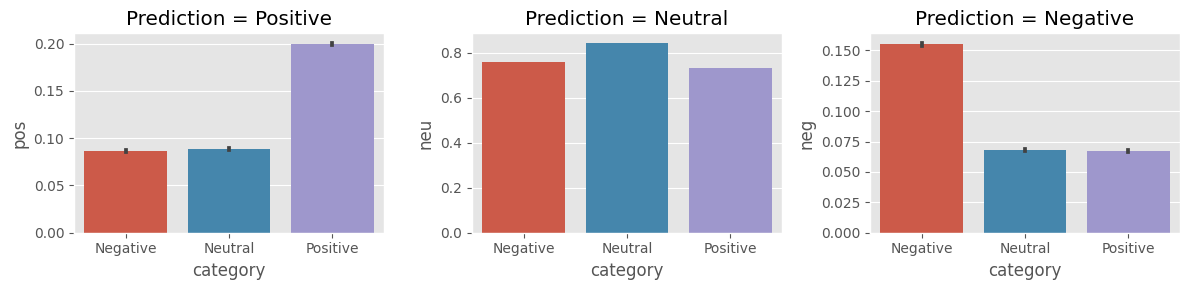

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='category', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='category', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='category', y='neg', ax=axs[2])
axs[0].set_title('Prediction = Positive')
axs[1].set_title('Prediction = Neutral')
axs[2].set_title('Prediction = Negative')
plt.tight_layout()
plt.show()

# **ROBERTA Model**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 140.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)//100):
    try:
        text = row['clean_text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/18717 [00:00<?, ?it/s]